In [2]:
!nvidia-smi

Mon Aug 22 19:11:55 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install tensorflow-gpu==1.15.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install keras==2.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import keras

Using TensorFlow backend.


In [6]:
import tensorflow as tf
tf.version.VERSION

'1.15.2'

In [7]:
!pip install --upgrade h5py==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import sys
sys.path.append("/content/drive/MyDrive/MaskRCNN_Code/")

In [10]:
cd /content/drive/MyDrive/MaskRCNN_Code/

/content/drive/MyDrive/MaskRCNN_Code


In [11]:
!ls

annotations.json  BSEF19M035_A3.ipynb  dataset.rar  Mask_RCNN


In [12]:
!git clone https://github.com/AdeelaIslam/Mask_RCNN.git

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [13]:
sys.path.append("/content/drive/MyDrive/MaskRCNN_Code/Mask_RCNN/demo")

In [14]:
from train_mask_rcnn_demo import *
%matplotlib inline

VERS 0.2


In [17]:
# Extract Images
images_path = "dataset.zip"
annotations_path = "annotations.json"

extract_images(images_path, "/dataset")

Extracted: 10 images


In [18]:
dataset_train = load_image_dataset(annotations_path, "/dataset", "train")
dataset_val = load_image_dataset(annotations_path, "/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  annotations.json
Annotation json path:  annotations.json
Train: 9
Validation: 1
Classes: 2


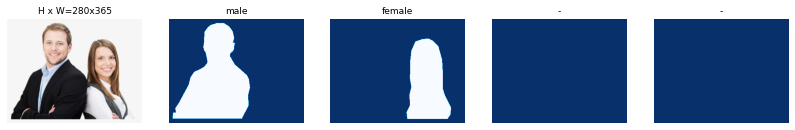

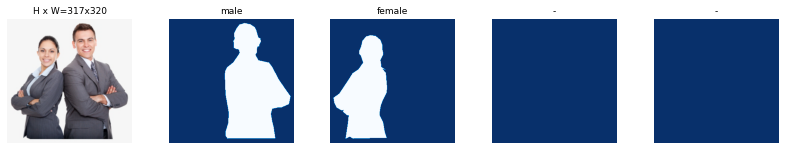

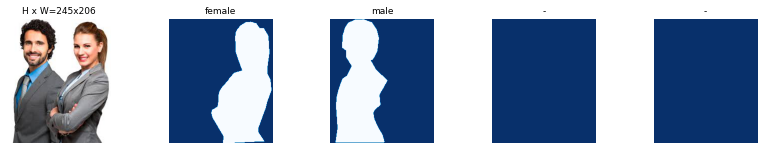

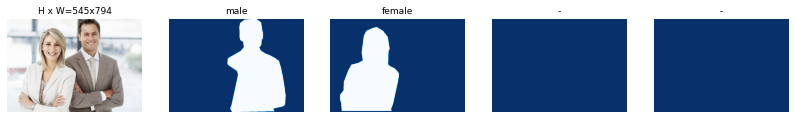

In [19]:
# Load image samples
display_image_samples(dataset_train)

In [20]:
# Load Configuration
config = CustomConfig(class_number)
#config.display()
model = load_training_model(config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


/content/drive/MyDrive/MaskRCNN_Code/Mask_RCNN/mask_rcnn_coco.h5


In [21]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/MyDrive/MaskRCNN_Code/Mask_RCNN/logs/object20220822T1919/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (Ti

Epoch 1/5
500/500 [==============================] - 504s 1s/step - loss: 0.1656 - val_loss: 0.0649


Epoch 2/5
500/500 [==============================] - 455s 909ms/step - loss: 0.0580 - val_loss: 0.0423
Epoch 3/5
500/500 [==============================] - 456s 912ms/step - loss: 0.0422 - val_loss: 0.0427
Epoch 4/5
500/500 [==============================] - 456s 911ms/step - loss: 0.0358 - val_loss: 0.0355
Epoch 5/5
500/500 [==============================] - 455s 911ms/step - loss: 0.0333 - val_loss: 0.0354


In [22]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)



Instructions for updating:
Use `tf.cast` instead.


Loading weights from  /content/drive/MyDrive/MaskRCNN_Code/Mask_RCNN/logs/object20220822T1919/mask_rcnn_object_0005.h5
Re-starting from epoch 5


original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


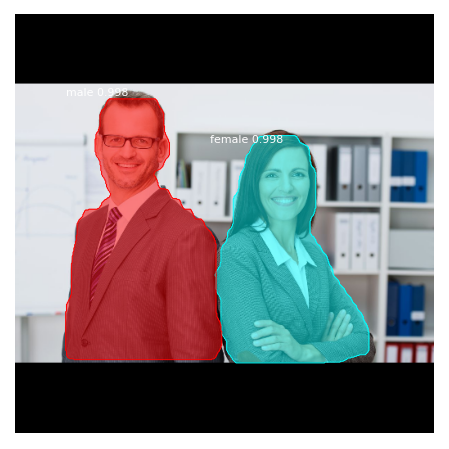

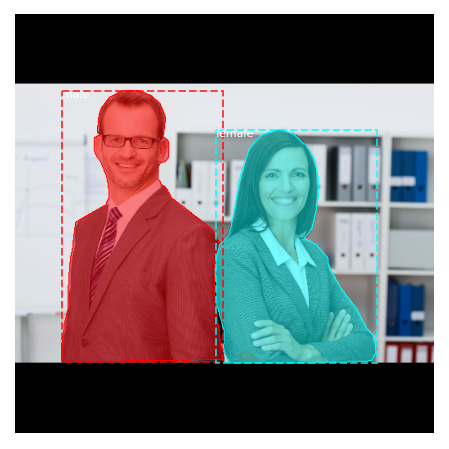

In [23]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)

**Testing on Previously saved (pre-trained) Model**

In [24]:
from mrcnn.visualize import random_colors, get_mask_contours, draw_mask
from google.colab.patches import cv2_imshow

In [25]:
# Load Image
img = cv2.imread("/content/test.jpg")

checkpoint_path = '/content/drive/MyDrive/MaskRCNN_Code/Mask_RCNN/logs/object20220822T1919/mask_rcnn_object_0005.h5'
test_model, inference_config = load_inference_model(num_classes=class_number, model_path=checkpoint_path)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]

Loading weights from  /content/drive/MyDrive/MaskRCNN_Code/Mask_RCNN/logs/object20220822T1919/mask_rcnn_object_0005.h5
Re-starting from epoch 5


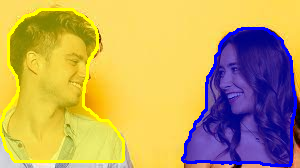

In [26]:
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
colors = random_colors(object_count)
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])

cv2_imshow(img)